# **Instalasi YOLOv5 dan Dependensi**

In [ ]:
# 1. Clone YOLOv5 Repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

# 2. Install pycocotools for COCO dataset
!pip install pycocotools



Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 17075 (delta 27), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17075/17075), 15.69 MiB | 7.69 MiB/s, done.
Resolving deltas: 100% (11721/11721), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 21.8 MB/s eta 0:00:00


# **Pengunduhan Dataset COCO**

In [ ]:
# 3. Download COCO Dataset (Subset)
import os

# Define dataset directories
os.makedirs("datasets/coco/images", exist_ok=True)
os.makedirs("datasets/coco/labels", exist_ok=True)

# Download COCO 2017 validation images (as a sample)
!curl -L "http://images.cocodataset.org/zips/val2017.zip" > val2017.zip
!unzip -q val2017.zip -d datasets/coco/images

# Download COCO 2017 annotations
!curl -L "http://images.cocodataset.org/annotations/annotations_trainval2017.zip" > annotations_trainval2017.zip
!unzip -q annotations_trainval2017.zip -d datasets/coco/


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  777M  100  777M    0     0  48.5M      0  0:00:16  0:00:16 --:--:-- 51.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  241M  100  241M    0     0  45.0M      0  0:00:05  0:00:05 --:--:-- 51.2M


# **Deteksi Objek**

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-10 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 426x640 1 person, 1 bottle, 3 chairs, 2 potted plants, 3 dining tables, 2 tvs, 3 refrigerators, 1 clock, 4 vases
Speed: 5.1ms pre-process, 7.2ms inference, 3.9ms NMS per image at shape (1, 3, 448, 640)
Saved 1 image to runs/detect/exp5


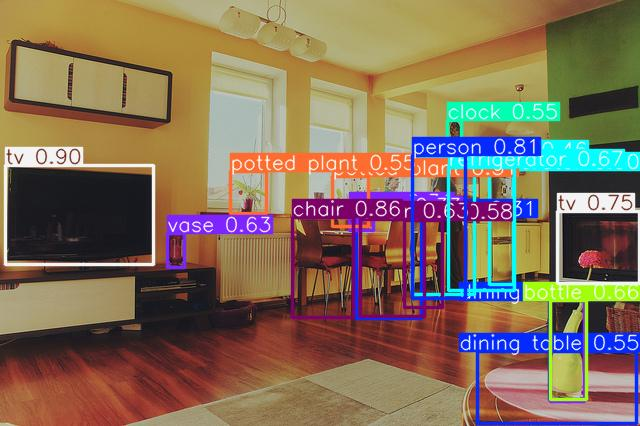

In [ ]:
import torch
from PIL import Image
from pathlib import Path
from IPython.display import Image as IPyImage, display

# Load YOLOv5 model pretrained on COCO dataset
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Pretrained model

# Define an example image path
example_image_path = "datasets/coco/images/val2017/000000000139.jpg"  # Replace with the actual path of your image

# Run object detection
results = model(example_image_path)

# Display results in console
results.print()

# Save detection results
output_dir = Path("runs/detect/exp")  # Default output directory
output_dir.mkdir(parents=True, exist_ok=True)

# Save and display the processed image
output_image_path = output_dir / Path(example_image_path).name
results.save(save_dir=output_dir)  # Save the image with bounding boxes
display(IPyImage(filename=str(output_image_path)))
